In [15]:
import pandas as pd

# Load your dataset (replace 'your_dataset.csv' with the path to your uploaded file)
data = pd.read_csv(r"C:\Users\gsanj\Downloads\public_dataset_updated.tar[1]\public_dataset\train\price_data\Feautures\AGI_merged.csv", parse_dates=['datetime'])


# Inspect the first few rows to confirm structure
print(data.head())


    datetime   low_x  high_x  volumefrom_x  volumeto_x  open_x  close_x  \
0 2018-06-07  0.1705  0.1819     171971.74    30552.18  0.1733   0.1724   
1 2018-06-08  0.1580  0.1724     155637.01    26085.69  0.1724   0.1677   
2 2018-06-09  0.1551  0.1677     113987.89    18213.82  0.1677   0.1557   
3 2018-06-10  0.1300  0.1651     290656.60    42127.22  0.1557   0.1309   
4 2018-06-11  0.1250  0.1398     133375.60    17682.48  0.1309   0.1340   

   MA_7_open  MA_14_open  MA_30_open  ...  MA_7_low  MA_14_low  MA_30_low  \
0   0.172057    0.166243    0.168313  ...  0.162100   0.155014   0.157837   
1   0.174943    0.166814    0.167560  ...  0.163043   0.155464   0.156687   
2   0.176114    0.165293    0.166563  ...  0.163300   0.155021   0.155530   
3   0.173529    0.164893    0.165420  ...  0.157043   0.153593   0.154363   
4   0.166500    0.163400    0.163817  ...  0.151971   0.153043   0.152820   

   price_diff_close_open  price_diff_high_low  volume_ratio  lag_1_close  \
0         

In [26]:
# Extract relevant features and target column
features = data[['open_x', 'MA_14_open', 'MA_30_open', 'MA_14_close',
                 'price_diff_close_open', 'price_diff_high_low', 'volume_ratio',
                 'lag_1_close', 'lag_7_close', 'lag_14_close', 'score']]
features = data[['low_x','high_x','volumefrom_x','volumeto_x','open_x','close_x']]

target = data['close_x']

# Fill missing values (NaNs) with 0
# features.fillna(0, inplace=True)

# Split data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)


In [27]:
from sklearn.preprocessing import StandardScaler

# Initialize scaler and fit to the training data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [28]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score

# Train Ridge Regression model
ridge = Ridge(alpha=1.0)
ridge.fit(X_train_scaled, y_train)

# Make predictions
y_pred_ridge = ridge.predict(X_test_scaled)

# Evaluate the model
print(f"Ridge RMSE: {mean_squared_error(y_test, y_pred_ridge, squared=False)}")
print(f"Ridge R²: {r2_score(y_test, y_pred_ridge)}")


Ridge RMSE: 0.000466108129398406
Ridge R²: 0.9997434269533317


C:\Users\gsanj\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [29]:
from sklearn.ensemble import RandomForestRegressor

# Train Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)
rf.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf.predict(X_test)

# Evaluate the model
print(f"Random Forest RMSE: {mean_squared_error(y_test, y_pred_rf, squared=False)}")
print(f"Random Forest R²: {r2_score(y_test, y_pred_rf)}")


Random Forest RMSE: 0.0015045500826609012
Random Forest R²: 0.9973266798373454


C:\Users\gsanj\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [30]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Reshape data for LSTM input (samples, timesteps, features)
X_train_lstm = X_train.values.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test_lstm = X_test.values.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Define LSTM model
lstm = Sequential()
lstm.add(LSTM(50, activation='relu', input_shape=(1, X_train.shape[1])))
lstm.add(Dropout(0.2))  # Prevent overfitting
lstm.add(Dense(1))

# Compile and train the model
lstm.compile(optimizer='adam', loss='mse')
lstm.fit(X_train_lstm, y_train, epochs=50, batch_size=32, validation_data=(X_test_lstm, y_test))

# Make predictions
y_pred_lstm = lstm.predict(X_test_lstm).flatten()

# Evaluate the model
print(f"LSTM RMSE: {mean_squared_error(y_test, y_pred_lstm, squared=False)}")
print(f"LSTM R²: {r2_score(y_test, y_pred_lstm)}")


Epoch 1/50


C:\Users\gsanj\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 4619358.0000 - val_loss: 308129.2500
Epoch 2/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3439077.0000 - val_loss: 217709.5781
Epoch 3/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2677350.0000 - val_loss: 54158.6523
Epoch 4/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1040211.9375 - val_loss: 24189.4844
Epoch 5/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1089356.2500 - val_loss: 94792.0078
Epoch 6/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 614844.4375 - val_loss: 41605.8164
Epoch 7/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 636362.9375 - val_loss: 143992.9844
Epoch 8/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1362550.1250 - val_loss: 79819.3047
Epoch 9/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 565305.1875 - val_loss: 73483.0703
Epoch 10/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1155776.8750 - val_loss: 36096.5234
Epoch 11/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 810920.500

C:\Users\gsanj\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [31]:
from sklearn.ensemble import GradientBoostingRegressor

# Train Gradient Boosting Regressor
gb = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb.fit(X_train, y_train)

# Make predictions
y_pred_gb = gb.predict(X_test)

# Evaluate the model
print(f"Gradient Boosting RMSE: {mean_squared_error(y_test, y_pred_gb, squared=False)}")
print(f"Gradient Boosting R²: {r2_score(y_test, y_pred_gb)}")


Gradient Boosting RMSE: 0.0005676004314415183
Gradient Boosting R²: 0.9996195276420123


C:\Users\gsanj\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


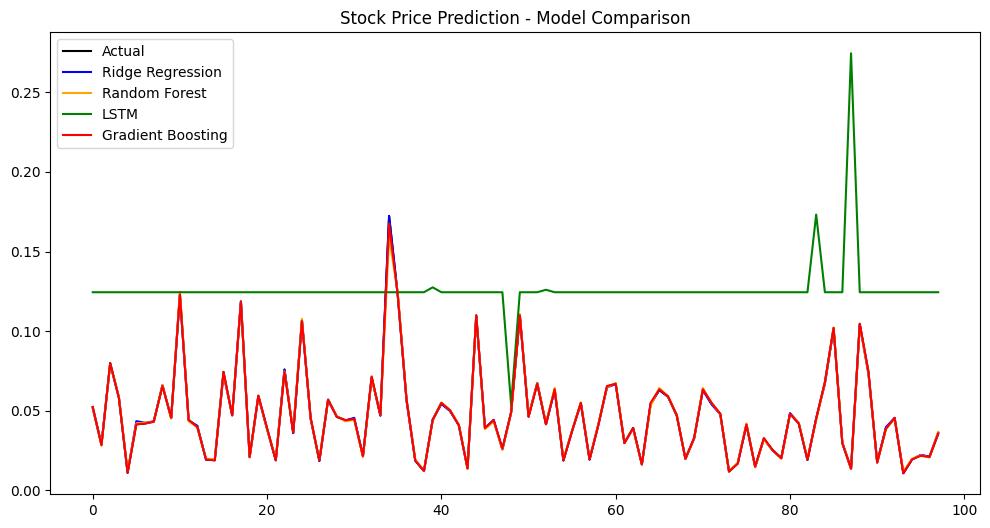

In [32]:
import matplotlib.pyplot as plt

# Plot actual vs predicted stock prices
plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label='Actual', color='black')
plt.plot(y_pred_ridge, label='Ridge Regression', color='blue')
plt.plot(y_pred_rf, label='Random Forest', color='orange')
plt.plot(y_pred_lstm, label='LSTM', color='green')
plt.plot(y_pred_gb, label='Gradient Boosting', color='red')
plt.legend()
plt.title('Stock Price Prediction - Model Comparison')
plt.show()


In [25]:
from sklearn.ensemble import VotingRegressor

# Create Voting Regressor with all models
voting_regressor = VotingRegressor([('ridge', ridge), ('rf', rf), ('gb', gb)])
voting_regressor.fit(X_train, y_train)

# Make predictions
y_pred_voting = voting_regressor.predict(X_test)

# Evaluate the ensemble model
print(f"Voting Regressor RMSE: {mean_squared_error(y_test, y_pred_voting, squared=False)}")
print(f"Voting Regressor R²: {r2_score(y_test, y_pred_voting)}")


Voting Regressor RMSE: 0.004713708033449115
Voting Regressor R²: 0.9737600481423836


C:\Users\gsanj\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
